In [12]:
%matplotlib inline
import pandas as pd
import numpy as np


# When can I retire?

Compound interest is powerful but takes a long time. To retire in 5 or 10 years the most important number is not your return on investment. It's your savings rate. [Learn more](http://www.mrmoneymustache.com/2012/01/13/the-shockingly-simple-math-behind-early-retirement/)

In [13]:
# Inputs
current_annual_income = 70000
current_annual_savings = 47500
current_portfolio_value = 100

In [14]:
annual_return_on_investment = 0.05
withdrawal_rate = 0.04

In [15]:
import locale
locale.setlocale(locale.LC_ALL, 'de_DE')

current_savings_rate = current_annual_savings / current_annual_income * 100
print("Current Savings Rate: "+str(round(current_savings_rate,2))+"% \n")

current_annual_expenses = current_annual_income - current_annual_savings
print("Current Annual Expenses: "+locale.format("%.f",current_annual_expenses,grouping=True))

Current Savings Rate: 67.86% 

Current Annual Expenses: 22.500


In [16]:
from collections import OrderedDict
roi_str = str(annual_return_on_investment*100)+'% ROI'
df = pd.DataFrame({'Income': ['-'], 'Expenses':['-'], roi_str:['-'], 'Percent Of Expenses Covered By ROI':['-'], 'Change In Networth (Savings + ROI)':['-'], 'Networth':[locale.format("%.f", current_portfolio_value, grouping=True)]})
df = df[['Income', 'Expenses', str(annual_return_on_investment*100)+'% ROI', 'Percent Of Expenses Covered By ROI', 'Change In Networth (Savings + ROI)', 'Networth']]
df.index.name = 'End of year'


In [17]:
import numpy as np
from IPython.core.display import display, HTML
year_roi = 0
year_prior_portfolio = current_portfolio_value
year_index = 1

def calculate_year_to_retirement(rate):
    retired = False
    month_index = 1
    while not retired:
        fv = np.fv(annual_return_on_investment/12, month_index*1, -current_annual_income*(rate/100)/12, -current_portfolio_value)
        if fv > (current_annual_income*1.2*(1-rate/100))/annual_return_on_investment:
            retired = True
        month_index += 1
    return round(month_index/12,1)

year_index = 1
while year_roi < current_annual_expenses*1.2:
    year_roi = (current_annual_savings/2+year_prior_portfolio)*annual_return_on_investment
    year_networth = np.fv(annual_return_on_investment/12, year_index*12, -current_annual_income*(current_savings_rate/100)/12, -current_portfolio_value)
    year_index += 1
    
    df = df.append({'Income': locale.format("%.f", current_annual_income, grouping=True), 'Expenses':locale.format("%.f", current_annual_expenses, grouping=True), roi_str:locale.format("%.f", year_roi, grouping=True), 'Percent Of Expenses Covered By ROI':str(round(year_roi/current_annual_expenses*100, 2))+'%', 'Change In Networth (Savings + ROI)':locale.format("%.f", year_networth-year_prior_portfolio, grouping=True), 'Networth':locale.format("%.f", year_networth, grouping=True)}, ignore_index=True)
    year_prior_portfolio = year_networth
    
display(HTML('<h1>You can retire in '+str(calculate_year_to_retirement(current_savings_rate))+' years</h1>'))
display(HTML('<h2>With a savings rate of '+str(round(current_savings_rate,2))+'%</h2>'))
df

,Income,Expenses,5.0% ROI,Percent Of Expenses Covered By ROI,Change In Networth (Savings + ROI),Networth
0,-,-,-,-,-,100
1,70.000,22.500,1.192,5.3%,48.609,48.709
2,70.000,22.500,3.623,16.1%,51.096,99.805
3,70.000,22.500,6.178,27.46%,53.710,153.515
4,70.000,22.500,8.863,39.39%,56.458,209.973
5,70.000,22.500,11.686,51.94%,59.346,269.319
6,70.000,22.500,14.653,65.13%,62.383,331.702
7,70.000,22.500,17.773,78.99%,65.574,397.276
8,70.000,22.500,21.051,93.56%,68.929,466.205
9,70.000,22.500,24.498,108.88%,72.456,538.661


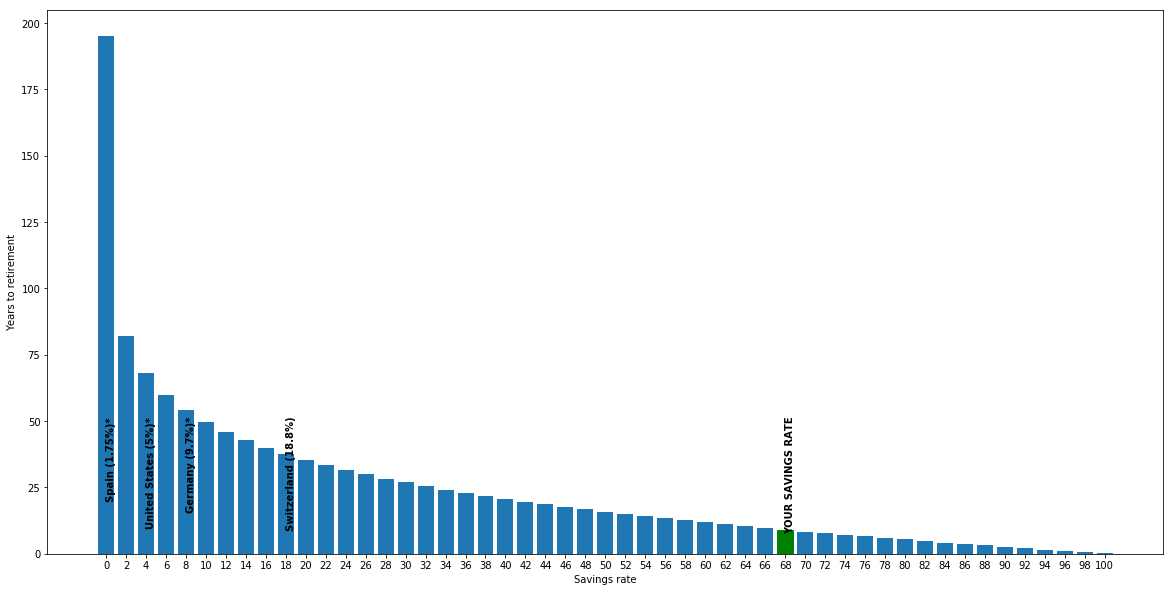

*Avg Household Savings Rates (2016) Sources: OECD, IMF


In [18]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

rate_increment = np.arange(0, 102, 2)
x = np.arange(len(rate_increment))
years_to_retirement = []

for rate in rate_increment:
    years_to_retirement.append(calculate_year_to_retirement(rate))
    
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel('Savings rate')
ax.set_ylabel('Years to retirement')
barlist = plt.bar(x, years_to_retirement)

plt.xticks(x, rate_increment)

ax.text(0, years_to_retirement[0]/4, 'Spain (1.75%)*', color='black', fontweight='bold', rotation=90)
ax.text(2, years_to_retirement[0]/4, 'United States (5%)*', color='black', fontweight='bold', rotation=90)
ax.text(4, years_to_retirement[0]/4, 'Germany (9.7%)*', color='black', fontweight='bold', rotation=90)
ax.text(9, years_to_retirement[0]/4, 'Switzerland (18.8%)', color='black', fontweight='bold', rotation=90)

barlist[round(current_savings_rate/2)].set_color('g')
ax.text(round(current_savings_rate/2), years_to_retirement[0]/4, 'YOUR SAVINGS RATE', color='black', fontweight='bold', rotation=90)

plt.show()
print('*Avg Household Savings Rates (2016) Sources: OECD, IMF')